# Welcome to Intro to Artificial Inteligence HW1 code part!

In this part you will get to implement algorithms learned in class from scratch.

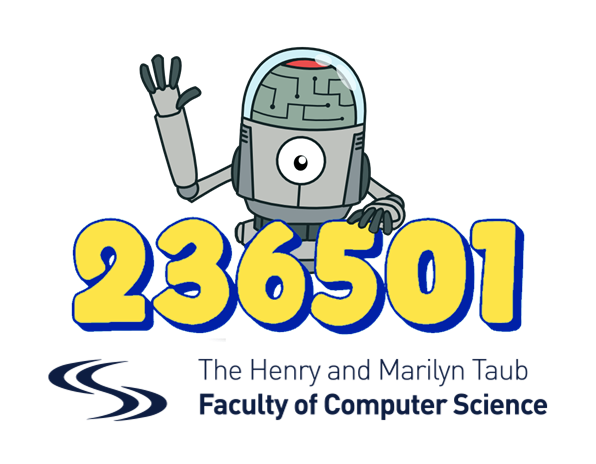

The exercise's objectives are the following:

1.   Understand the algorithms learned in class.
2.   Learn how to write code in Python.
3.   Have fun!


The purpose of this notebook is to provide the requirements of the practical part and some visualizations. Your implementation should be in the provided `Algorithms.py` file **ONLY**.

# Google Colab
Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited for AI, machine learning, data analysis and education. Technically, Colab is a hosted Jupyter Notebook service that requires no setup to use, while providing free access to computing resources including GPUs.

It is recommended to go through this [guide](https://www.datacamp.com/tutorial/tutorial-google-colab-for-data-scientists) before starting the assignment.

**If you are indeed using Google Colab**, uncomment the following cells, change `my_path` to the location of your files and run the cells:

In [ ]:
# !pip install heapdict

In [ ]:
# import os
# import sys
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# my_path = f'MyDrive/path/to/folder'
# os.environ['MY_PATH'] = f'/content/drive/{my_path}/*'
# !cp -r $MY_PATH* .
# sys.path.append(os.environ['MY_PATH'] + '/CampusEnv.py')
# sys.path.append(os.environ['MY_PATH'] + '/Algorithms.py')

These will make sure Google Colab knows how to reach all of your files, and has all of the necessary libraries in order to run all of the following code.

If you're not using Google Colab (which we highly recommend), please make sure to have the correct Python version installed (3.10) and all relevant libraries compatible. Problems caused because of incompatabilities **will not be taken into consideration** when evaluation your work.

## Important tip:
If the same variable name appears in two different cells, the variable value will be determined by the last cell to run, rather than by the position of the cell.

Let's see an example,  run the three cells below:

In [ ]:
# cell 1
x = 3

In [ ]:
# cell 2
x = 5

In [ ]:
print(x)

Now rerun cell 1 and print x again with cell 3.

The same applies to functions, classes, etc. This also means that after each change you make to your algorithmic implementation in the `Algorithms.py` file, you may have to re-run your entire notebook (or at least make sure your **`import`** operations had imported the most recent version of your code).

# Getting started with Open AI gym

[OpenAI Gym](https://gymnasium.farama.org/) is a toolkit for comparing AI and RL algorithms. It contains a wide variety of environments that you can train agents on, and it is often used for benchmarking new methods in the AI research literature.
There are also [leaderboards](https://github.com/openai/gym/wiki/Leaderboard) for different gym-environments, showing which methods have been most successful so far.

In this assignments we will use OpenAI gym (within the course's scope).



# The Environment
You will work on a custom version of the [Frozen Lake](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/) environment from OpenAI. This custom environment will be called Campus, and is tailored specifically to our needs here along this notebook.

As mentioned in the background story, your job is to help Amy, the chinese foreign exchange student, to get from the Taub building to the Emerson building across the Technion's campus.

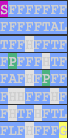

Breaking it down to our formal definition:

1. Your goal is to find a path from the initial position S to **a** goal position G.
2. Each position on the map is marked with a letter, and each letter has a different meaning:
  *   S - Initial position (**Start**). There's only one initial state on the map and it is always on the upper-left corner of
          the grid.
  *   G - Final state (**Goal**). As learned in class, there may be multiple goal states (such as different entrances to the
          building).
  *   H - Construction **Hole**. When the agent reaches such hole, it falls into the construction site and is not able to
          continue walking.
  *   P - **Portal**. There are either two or zero portal on the map. When reaching a portal, the agent is immediately
          transported to the other portal. You may assume that portals do not appear in a final state or in an initial state.
  *   F - **Free** space. This is the most common square on the map. The agent can walk on the free paths safely.

The agent can move faster by collecting 3 special objects.

  *   T - [**Talaria**](https://en.wikipedia.org/wiki/Talaria). A pair of winged sandals that can help the agent fly to the
          next square.
  *   A - **Air Jordans**. A pair of jumping shoes that can help the agent jump to the next square.
  *   L - **Lightning**. Can helps the agent run faster to the next square.

When the agent performs a transition (s,a,s') and collects one of the objects (T,A,L) at state s', the collected object changes the cost of the transition (as detailed below).

3. The cost of each transition (s,a,s') is based on the mark of the square s' you pass to:
  * S - 1
  * G - 1
  * H - $\mathcal{\infty}$
  * P - 100
  * F - 10
  * T - 3
  * A - 2
  * L - 1

4. When visualizing the map, the pink square marks where the agent currently is.

5. The number of states is equal to the number of squares on the map. The state index is calculated as follows: *row_number x num_of_total_columns + column_number*. For example, the state index of the portal square on row 3 of our example map is : 3 * 8 + 1 = 25.

6. The agent can perform 4 actions:
  * 0 - Down
  * 1 - Right
  * 2 - Up
  * 3 - Left
  
7. If the agent tries to move outside of the map's boundaries, it stays in the same place.

8. Section 6 describes the order in which the nodes should be created (later on, when you'll be implementing different search algorithms).

In [ ]:
import time
from IPython.display import clear_output

from typing import List, Tuple
from CampusEnv import CampusEnv
from Algorithms import *

In [ ]:
DOWN = 0
RIGHT = 1
UP = 2
LEFT = 3

# Maps
A map can be produced manually as shown in the cell below. We will only work on maps in which there is a valid path from the initial state to a final state.

In [ ]:
MAPS = {
    "4x4": ["SFFF",
            "FHFH",
            "FFFH",
            "HFFG"],
    "8x8": ["SFFFFFFF",
            "FFFFFTAL",
            "TFFHFFTF",
            "FPFFFHTF",
            "FAFHFPFF",
            "FHHFFFHF",
            "FHTFHFTL",
            "FLFHFFFG"],
}


# The Campus Environment ⛷
The file `CampusEnv.py` implements our own version of the Campus environment. It is recommended to go through its code in order to make sure you understand it.

**Note:**

**You are not allowed to change the `CampusEnv.py` file.** Changes to the file **will be tracked** and points will be deducted for any changes made.

### Playing around with the Campus Environment

We would like you to get a taste of how does the environment oprate, and how will the agent operate with it.

Let's begin by creating a new environment object. In order to create an environment object, you must provide it with a map (we will be using the the 8x8 example map for our demonstrations):

In [ ]:
env = CampusEnv(MAPS["8x8"])
state = env.reset()
print('Initial state:', state)
print('Goal states:', env.goals)

We can take a look at the state space $\mathcal{S}$ (all possible states) and action space $\mathcal{A}$ (all possible actions):

In [ ]:
print(f"Action Space {env.action_space}")
print(f"State Space {env.observation_space}")

***Remark***: You may have noticed that gym uses `observation_space` instead of state space. For the purpose of this homework, the state space is the same as the observation space. However, please note that in some other problems the states may be partially observed, so the space of possible states may not be the same as the space of possible observations.

Now we will go through some usfel methods (it is still recommended to go through the other methods in the class).

`render()` - returns a printable view of the map:

In [ ]:
print(env.render())

The pink square represents the agent. The letter ״*H*״ represents holes, and a yellow square is a final state.

Here are two more useful methods-

`set_state(state)` - sets the current state of the agent:

In [ ]:
env.set_state(18)
print(env.render())

`get_state()` - returns the current state of the agent:

In [ ]:
print(f"the agent is at state: {env.get_state()}")

Another method is `succ(state)` - that returns a dictionary that contains information about all the successors of a state.

*   The dictionary's keys are the actions.
*   The key's values are tuples of the form $\mathcal{(next state, cost, terminated)}$. Note that 'terminated' is set to TRUE when the agent reaches a **final state** or a **hole**.



***Tip***: You can loop through both keys and values by using the `items()` method.


In [ ]:
current_state = env.get_state()
print(f"Current state: {current_state}\n")
for action, successor in env.succ(current_state).items():
  print(f"*** Action: {action} ***")
  print(f"Next state: {successor[0]}")
  print(f"Cost: {successor[1]}")
  print(f"Terminated: {successor[2]}\n")

As you can see, the action 0 (down) will move the agent to state 26 and the transition will cost you 10. Action 1 will move the agent to state 19, which is a hole that will terminate your run.

`is_final_state(state)` can assist you in distinguishing between a final state and a hole.

In [ ]:
state, cost, terminated = env.succ(current_state)[1]

print(f"Next state: {state}")
print(f"Cost: {cost}")
print(f"Terminated: {terminated}")
print(f"Final state: {env.is_final_state(state)}")

Let's see what happens when we apply `succ(state)` on a hole:

In [ ]:
print(f"Current state: 19\n")
for action, (state, cost, terminated) in env.succ(19).items():
  print(f"*** Action: {action} ***")
  print(f"Next state: {state}")
  print(f"Cost: {cost}")
  print(f"Terminated: {terminated}\n")

As you can see, if the operator cannot be applied to the state, all returned values are `None`.

**Now it is time to move the agent around 🤖.**

`step(action)` - will move the agent one step along the map.


In [ ]:
new_state, cost, terminated = env.step(DOWN)
print(env.render())
print("New State:", new_state)
print("Cost:", cost)
print("Terminated:", terminated)

The step-function returns the following information:
* __New State__: The state the agent is in after the action is taken.
* __Cost__: The immediate cost.
* __Terminated__: Can the agent continue moving? As mentioned, in our environment, this value is set to FALSE until the agent reaches a **hole** or a **final state**, as mentioned before.

Let's move the agent one step left towards the portal and see what happens.

In [ ]:
new_state, cost, done = env.step(LEFT)
print(env.render())
print("New state:", new_state)
print("cost:", cost)
print("Done:", done)

***Have you noticed that the agent has moved to the second portal😲?***

In some maps, the portals can significantly shorten the path, but going through them is much more expensive, so it is not always advisable.


Here are a few more useful attributes and methods:


`env.nrow`, `env.ncol` - Row and Column number.

`env.nA` - Number of actions.

`env.nS` - Number of states.

`env.lastaction` - The last action performed by the agent.

`env.p1`, `env.p2` - The state index for each portal. If there are no portals on the map, these are set to None.

`env.inc(row, col, action)` - Given a position and an action, returns the new position.

`env.to_row_col(state)` - Converts between state and location on the map.

`env.to_state(row, col)` - Converts between location on the map and state.



### That's it for our DEMO 🥳

It's time to reset the environment.

In [ ]:
print(f"current state befor reset: {env.get_state()}")
env.reset()
print(f"current state after reset: {env.get_state()}")

One (quite bad) strategy for the agent to follow is to randomly choose an action at each step. Inside a gym-based environment this can be done using `env.action_space.sample()`, which samples a random action from the action space.

As an example, we implement an agent that uses such strategy (we will call it a ***Random Agent***).

**Go over the following code** and make sure that you understand what's going on. Here, we use `clear_output()` to clear the output of the Jupyter cell, and `time.sleep()` to pause between each action.

Let's see what would happen if we try to brute-force our way to solving the problem - we'll create an infinite loop that runs until the agent reaches the final state. The `env.action_space.sample()` method automatically selects one random action from set of all possible actions.

In [ ]:
class RandomAgent():
  def __init__(self):
    self.env = None

  def animation(self, epochs: int ,state: int, action: List[int], total_cost: int) -> None:
      clear_output(wait=True)
      print(self.env.render())
      print(f"Timestep: {epochs}")
      print(f"State: {state}")
      print(f"Action: {action}")
      print(f"Total Cost: {total_cost}")
      time.sleep(1)

  def random_search(self, CampusEnv: env) -> Tuple[List[int],int]:
    self.env = env
    self.env.reset()
    epochs = 0
    cost = 0
    total_cost = 0

    actions = []

    state = self.env.get_initial_state()
    while not self.env.is_final_state(state):
      action = self.env.action_space.sample()
      new_state, cost, terminated = self.env.step(action)

      while terminated is True and self.env.is_final_state(state) is False:
        self.env.set_state(state)
        action = self.env.action_space.sample()
        new_state, cost, terminated = self.env.step(action)

      actions.append(action)
      total_cost += cost
      state = new_state
      epochs += 1

      self.animation(epochs,state,action,total_cost)

    return (actions, total_cost)

Let's check out the Random Agent's performance!

The output of this agent is the sequence of actions that led to the solution, and the path's cost.

As you would expect, our Random Agent is not very successful, so we'll print its actions as they happen.

1.   **Stop the agent's run in the middle if you are tired of looking at it** (you may do this by interrupting the notebook's
        kernel).
2.   After watching the agent, **please put the code in the box below in the a comment for your own comfort**.

In [ ]:
agent = RandomAgent()
agent.random_search(env)

**Did you remember to put the code above in a comment?!**

As you can see, a random policy is, unsurprisingly, not a good policy. However, what else can we do?

This is where you come in!

In this assignment you will be required to implement the following algorithms taught in class in order to solve the problem.

Algorithms:
1. **DFS-G**
2. **Uniform Cost Search (UCS)**
3. **W-A***
4. **A*** (using your W-A* imlpementation)

***Important to note!***

Each agent should return a tuple of the form $\mathcal{(actions, cost, expanded)}$ representing the solution.
* **actions** - a list of integers containing the sequence of actions that produced the agent's solution (and not the entire search process).
* **cost** - an integer to represent the total cost of the solution.
* **expanded** - an integer to represent the number of nodes that have been expanded during the search process (as taught in class, a node is considered expanded if we check for its successors).

The solution to our search problem is the path to the final state, not the final state itself. By saving the actions, we are able to restore the path the agent found.

**Any other output, unless otherwise specified, will cause the running of the grading tests to fail and will result in a grade of 0 !**

**Some Useful Tips:**

1. Follow the pseudo-code shown in the lectures and tutorials.
2. We advise you to write your code within the classes. This prevent from functions with the same name to overlap  while running the notebook.
3. You may implement your code as you like, but consider inherenting from the a general "Agent" class and implement some utilty methods such as a "solution" method which recieves a node and returns a path (sequence of actions) leading to that node.
4. Consider implementing a "node" class.
5. Using small maps to test your implementation will help you debug your code along the way.

The function below (`print_solution()`) can be used for debugging purposes. It prints the sequence of actions it receives. The function will not be used to test your code, so you are welcome to change it as much as you like.

In [ ]:
def print_solution(actions,env: CampusEnv) -> None:
    env.reset()
    total_cost = 0
    print(env.render())
    print(f"Timestep: {1}")
    print(f"State: {env.get_state()}")
    print(f"Action: {None}")
    print(f"Cost: {0}")
    time.sleep(1)

    for i, action in enumerate(actions):
      state, cost, terminated = env.step(action)
      total_cost += cost
      clear_output(wait=True)

      print(env.render())
      print(f"Timestep: {i + 2}")
      print(f"State: {state}")
      print(f"Action: {action}")
      print(f"Cost: {cost}")
      print(f"Total cost: {total_cost}")

      time.sleep(1)

      if terminated is True:
        break

## 1. DFS-G
**TO DO:** Implement the Depth First Search (DFS) algorithm on a graph (as was shown in class).

Your code should be fully implemented inside the `DFSGAgent()` class that is in the `Algorithms.py` file.

Let's test your DFS-G agent!

In [ ]:
DFSG_agent = DFSGAgent()
actions, total_cost, expanded = DFSG_agent.search(env)
print(f"Total_cost: {total_cost}")
print(f"Expanded: {expanded}")
print(f"Actions: {actions}")

assert total_cost == 148.0, "Error in total cost returned"
assert expanded == 20, "Error in number of expanded nodes returned"

The assertions above will help you make sure that you return the correct values in a correct way. In case you fail to pass these, please go over your implementation and check whether you return the required values properly.

Now, Let's also visualize the solution found by the DFS-G agent!

In [ ]:
print_solution(actions, env)

# Heapdict
For the next algorithms, you will be required to maintain an "open" queue based on a certain value (g/h/v). To manage these queues efficiently and conveniently, please use [Heapdict](https://www.geeksforgeeks.org/priority-queue-using-queue-and-heapdict-module-in-python/). Heapdict implements the MutableMapping ABC, meaning it works pretty much like a regular Python [dictionary](https://www.geeksforgeeks.org/python-dictionary/), and is designed to be used as a priority queue. Along with functions provided by ordinary dict(), it also has the additional popitem() and peekitem() functions which return the pair with the lowest priority.

**Note:**

When two nodes have the same minimum value, your implementation should select the node with the lower state index first. Instead of defining priority as an integer, you can define it as a tuple (value, state, ...).




## 2. Uniform Cost Search (UCS)
**TO DO:** Implement the Uniform Cost Search (UCS) algorithm (as was shown in class).

Your code should be fully implemented inside the `UCSAgent()` class that is in the `Algorithms.py` file.

In [ ]:
UCS_agent = UCSAgent()
actions, total_cost, expanded = UCS_agent.search(env)
print(f"Total_cost: {total_cost}")
print(f"Expanded: {expanded}")
print(f"Actions: {actions}")

In [ ]:
print_solution(actions, env)

## 3. Weighted A*

**TO DO:** Implement the Weighted A* algorithm (as was shown in class).

Your code should be fully implemented inside the `WeightedAStarAgent()` class that is in the `Algorithms.py` file.

***Note:***
* A parameter called `h_weight` is passed to the `search()` method in the `WeightedAStarAgent()` class, which indicates how much weight is given to the heuristics function (ranging from 0 to 1).
* You should implement the $\mathcal{H_{Campus}}$ heurisitc function as required in the instructions (from the assignment's pdf file).

In [ ]:
WAstar_agent = WeightedAStarAgent()
actions, total_cost, expanded = WAstar_agent.search(env, h_weight=0.7)
print(f"Total_cost: {total_cost}")
print(f"Expanded: {expanded}")
print(f"Actions: {actions}")

In [ ]:
print_solution(actions, env)

## 4. A*

**TO DO:** Implement the A* algorithm (as was shown in class).

As hinted, consider how you may use your implementation from the previous section in order to easily and implement A*.

Your code should be fully implemented inside the `AStarAgent()` class that is in the `Algorithms.py` file.

***Note:***
* You should use the same $\mathcal{H_{Campus}}$ heurisitc function that you already implemented for the W-A* algorithm.

In [ ]:
Astar_agent = AStarAgent()
actions, total_cost, expanded = Astar_agent.search(env)
print(f"Total_cost: {total_cost}")
print(f"Expanded: {expanded}")
print(f"Actions: {actions}")

In [ ]:
print_solution(actions, env)

# Benchmarking

In this section, we would like you to compare the different search algorithms that you have implemented. The take-home message shpould be that there is no "one algorithm fits all".

In [ ]:
import csv

test_maps = {
    "map12x12": ['SFAFTFFTHHHF',
                 'AFLTFFFFTALF',
                 'LHHLLHHLFTHP',
                 'HALTHAHHAPHF',
                 'FFFTFHFFAHFL',
                 'LLTHFFFAHFAT',
                 'HAAFFALHTATF',
                 'LLLFHFFHTLFH',
                 'FATAFHTTFFAF',
                 'HHFLHALLFTLF',
                 'FFAFFTTAFAAL',
                 'TAAFFFHAFHFG'],
    "map15x15": ['SFTTFFHHHHLFATF',
                 'ALHTLHFTLLFTHHF',
                 'FTTFHHHAHHFAHTF',
                 'LFHTFTALTAAFLLH',
                 'FTFFAFLFFLFHTFF',
                 'LTAFTHFLHTHHLLA',
                 'TFFFAHHFFAHHHFF',
                 'TTFFLFHAHFFTLFP',
                 'TFHLHTFFHAAHFHF',
                 'HHAATLHFFLFFHLH',
                 'FLFHHAALLHLHHAT',
                 'TLHFFLTHFTTFTTF',
                 'AFLTPAFTLHFHFFF',
                 'FFTFHFLTAFLHTLA',
                 'HTFATLTFHLFHFAG'],
    "map20x20" : ['SFFLHFHTALHLFATAHTHT',
                  'HFTTLLAHFTAFAAHHTLFH',
                  'HHTFFFHAFFFFAFFTHHHT',
                  'TTAFHTFHTHHLAHHAALLF',
                  'HLALHFFTHAHHAFFLFHTF',
                  'AFTAFTFLFTTTFTLLTHPF',
                  'LFHFFAAHFLHAHHFHFALA',
                  'AFTFFLTFLFTAFFLTFAHH',
                  'HTTLFTHLTFAFFLAFHFTF',
                  'LLALFHFAHFAALHFTFHTF',
                  'LFFFAAFLFFFFHFLFFAFH',
                  'THHTTFAFLATFATFTHLLL',
                  'HHHAFFFATLLALFAHTHLL',
                  'HLFFFFHFFLAAFTFFPAFH',
                  'HTLFTHFFLTHLHHLHFTFH',
                  'AFTTLHLFFLHTFFAHLAFT',
                  'HAATLHFFFHHHHAFFFHLH',
                  'FHFLLLFHLFFLFTFFHAFL',
                  'LHTFLTLTFATFAFAFHAAF',
                  'FTFFFFFLFTHFTFLTLHFG'],
}

test_envs = {}
for map_name, map_inst in test_maps.items():
    test_envs[map_name] = CampusEnv(map_inst)


DFSG_agent = DFSGAgent()
UCS_agent = UCSAgent()
WAStar_agent = WeightedAStarAgent()
AStar_agent = AStarAgent()

weights = [0.3, 0.7, 0.9]

agents_search_function = [
    DFSG_agent.search,
    UCS_agent.search,
    AStar_agent.search,
]

header = [
    'map',
    'DFS-G cost', 'DFS-G num of expanded nodes',
    'UCS cost', 'UCS  num of expanded nodes',
    'A* cost', 'A*  num of expanded nodes',
    'W-A* (0.3) cost', 'W-A* (0.3) num of expanded nodes',
    'W-A* (0.7) cost', 'W-A* (0.7) num of expanded nodes',
    'W-A* (0.9) cost', 'W-A* (0.9) num of expanded nodes',
]

with open("results.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for env_name, env in test_envs.items():
        data = [env_name]
        for agent in agents_search_function:
            _, total_cost, expanded = agent(env)
            data += [total_cost, expanded]
        for w in weights:
            _, total_cost, expanded = WAStar_agent.search(env, w)
            data += [total_cost, expanded]
        writer.writerow(data)

**Note:**

* If you are running this notebook via Google Colab, the file `results.csv` will be created within the scope of your colab notebook. In order to download it to your computer/drive, you should download it from the **Files** section.